### Remapping GridSatB1 dataset into 0.1 deg x 0.1 deg from super high-resolution.
adding time dimension into 0.1-deg data for cdo mergetime

In [1]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset, date2num,num2date
from datetime import datetime

In [2]:
os.chdir('/data2/willytsai/TRMM_3hr/TRMM/2009_2018/')

In [3]:
files = sorted(glob.glob('*2014*')+glob.glob('*2015*')+glob.glob('*2016*')+
              glob.glob('*2017*')+glob.glob('*2018*')) # 2014-2018

In [ ]:
for n in range(len(files)):
    data2 = xr.open_dataset(files[n])
    lat_sav = data2.nlat
    lon_sav = data2.nlon

    prec_contain = np.zeros((1,len(lon_sav),len(lat_sav)))
    prec_contain[0,:,:] = data2.precipitation # precipitation [mm/hr]
    ## writing netcdf for further processes    
    dataset = Dataset('/data2/willytsai/TRMM_3hr/TRMM/2009_2018/merged/'+files[n]
              ,'w',format='NETCDF4_CLASSIC')

    lat = dataset.createDimension('nlat',len(lat_sav))
    lon = dataset.createDimension('nlon',len(lon_sav))
    time = dataset.createDimension('time',None)

    # write variables
    latitude = dataset.createVariable('nlat',np.float32,('nlat'))
    longitude = dataset.createVariable('nlon',np.float32,('nlon'))
    time = dataset.createVariable('time', np.float64, ('time',))
    time.units = 'hours since 2000-01-01'
    time.long_name = 'time'
    times_arr = time[:]
    precipitation = dataset.createVariable('precipitation',np.float32,('time','nlon','nlat'))

    latitude[:] = lat_sav
    longitude[:] = lon_sav
    dates = datetime.strptime(files[n][5:16],'%Y%m%d.%H')
    times = date2num(dates, time.units)
    time[:] = times
    precipitation[:,:] = prec_contain

    # Variable Attributes
    latitude.units = 'degree_north'
    longitude.units = 'degree_east'
    precipitation.units = 'mm/hr'

    dataset.close()

In [6]:
ff = xr.open_dataset('/data2/willytsai/TRMM_3hr/TRMM/2009_2018/merged/3B42.20140101.00.7.HDF.nc4')

In [7]:
ff.precipitation.values.shape

(1, 1440, 241)

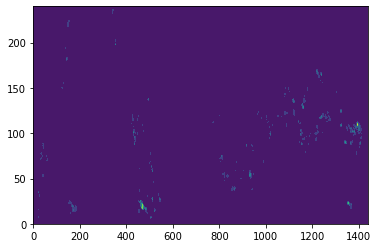

In [8]:
plt.contourf((ff.precipitation)[0,:,:].T)

In [12]:
ff_ori = xr.open_dataset('/data2/willytsai/TRMM_3hr/TRMM/2009_2018/3B42.20140101.00.7.HDF.nc4')

In [13]:
ff_ori.precipitation.shape

(1440, 241)

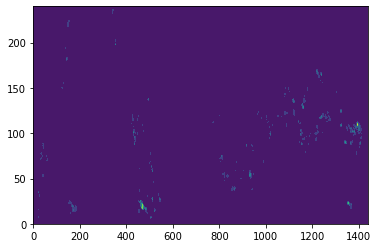

In [14]:
plt.contourf((ff_ori.precipitation)[:,:].T)

In [ ]:
# year='2013'

# # save regridded data one by one for preventing memory shortage....
# for file_name in files:
#     if (file_name[22:24]=='00' or file_name[22:24]=='03' or
#         file_name[22:24]=='06' or file_name[22:24]=='09' or
#         file_name[22:24]=='12' or file_name[22:24]=='15' or
#         file_name[22:24]=='18' or file_name[22:24]=='21'):
        
#         os.chdir('/data/willytsai/gridsat_BT/'+year)
#         #os.chdir('/data/willytsai/ISCCP/dynamo_ssa/gridsat_BT/')        
#         bt_contain = np.nan*np.zeros((len(lat_sav),len(lon_sav))) # no data since 2018.10.01
        
#         data = xr.open_dataset(file_name)
#         data2 = data.sel(lat=slice(-30,30)) # tropical only
#         bt_contain[:,:] = data2.irwin_cdr # Infrared Brightness temperature [K]

#         ## writing netcdf for further processes    
#         dataset = Dataset('/data/willytsai/gridsat_BT/remap_0.1deg/'+year+'/'+file_name
#                   ,'w',format='NETCDF4_CLASSIC')

#         lat = dataset.createDimension('lat',len(lat_sav))
#         lon = dataset.createDimension('lon',len(lon_sav))

#         latitude = dataset.createVariable('lat',np.float32,('lat'))
#         longitude = dataset.createVariable('lon',np.float32,('lon'))
#         irwin_cdr = dataset.createVariable('irwin_cdr',np.float32,('lat','lon'))

#         latitude[:] = lat_sav
#         longitude[:] = lon_sav
#         irwin_cdr[:,:] = bt_contain

#         # Variable Attributes
#         latitude.units = 'degree_north'
#         longitude.units = 'degree_east'
#         irwin_cdr.units = 'K'

#         dataset.close()
#         #####
    
#         # regrid the output netcdf file to 0.25deg by CDO command on linux 
#         #os.chdir('/data/willytsai/gridsat_BT/remap_0.1deg/'+year)
#         os.chdir('/data/willytsai/gridsat_BT/remap_0.1deg/'+year)
#         os.system('cdo remapbil,mygrid'+' '+file_name+' '+file_name[:25]+'_0.1deg.nc')
#         os.system('rm '+file_name) # removing original high-res data with irwin_cdr 